In [3]:
import random
import json
import pickle
import numpy as np
import tensorflow as tf

import nltk
from nltk.stem import WordNetLemmatizer

In [4]:
lemmatizer = WordNetLemmatizer()

In [5]:
intents = json.loads(open('/content/intents.json').read())

In [6]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
words = []
classes = []
documents = []
ignoreLetters = ['?', '!', '.', ',']

for intent in intents['intents']:
    for pattern in intent['patterns']:
        wordList = nltk.word_tokenize(pattern)
        words.extend(wordList)
        documents.append((wordList, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

words = [lemmatizer.lemmatize(word) for word in words if word not in ignoreLetters]
words = sorted(set(words))

classes = sorted(set(classes))

pickle.dump(words, open('words.pkl', 'wb'))
pickle.dump(classes, open('classes.pkl', 'wb'))

training = []
outputEmpty = [0] * len(classes)

for document in documents:
    bag = []
    wordPatterns = document[0]
    wordPatterns = [lemmatizer.lemmatize(word.lower()) for word in wordPatterns]
    for word in words:
        bag.append(1) if word in wordPatterns else bag.append(0)

    outputRow = list(outputEmpty)
    outputRow[classes.index(document[1])] = 1
    training.append(bag + outputRow)

random.shuffle(training)
training = np.array(training)

trainX = training[:, :len(words)]
trainY = training[:, len(words):]


model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_shape=(len(trainX[0]),), activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(len(trainY[0]), activation='softmax'))

sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

hist = model.fit(np.array(trainX), np.array(trainY), epochs=200, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)
print('Done')

Epoch 1/200
20/20 [==============================] - 1s 2ms/step - loss: 3.3239 - accuracy: 0.0700 
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 3.2281 - accuracy: 0.0800
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 3.1273 - accuracy: 0.1400
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 3.0335 - accuracy: 0.1700
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 2.8890 - accuracy: 0.1700
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 2.8067 - accuracy: 0.2000
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 2.6793 - accuracy: 0.3400
Epoch 8/200
20/20 [==============================] - 0s 2ms/step - loss: 2.5099 - accuracy: 0.3300
Epoch 9/200
20/20 [==============================] - 0s 2ms/step - loss: 2.4959 - accuracy: 0.3100
Epoch 10/200
20/20 [==============================] - 0s 2ms/step - loss: 2.2937 - accuracy: 0.4100
Epoch 11

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2579 - accuracy: 0.9266 - val_loss: 0.1410 - val_accuracy: 0.9593
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1132 - accuracy: 0.9665 - val_loss: 0.0949 - val_accuracy: 0.9705
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0779 - accuracy: 0.9767 - val_loss: 0.0800 - val_accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0596 - accuracy: 0.9819 - val_loss: 0.0698 - val_accuracy: 0.9788
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0447 - accuracy: 0.9861 - val_loss: 0.0752 - val_accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0360 - accuracy: 0.9886 - val_loss: 0.0729 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0293 - accuracy: 0.9909 - val_loss: 0.0814 - val_accuracy:

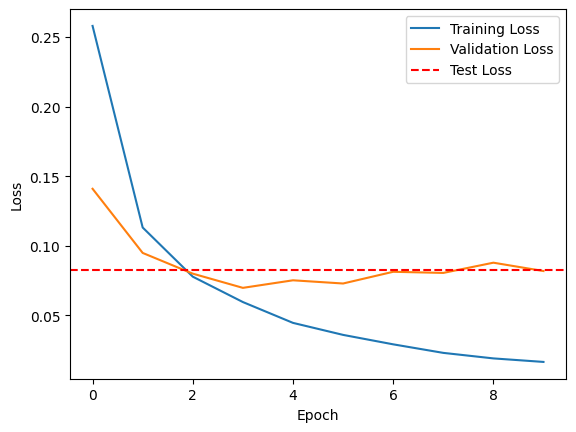

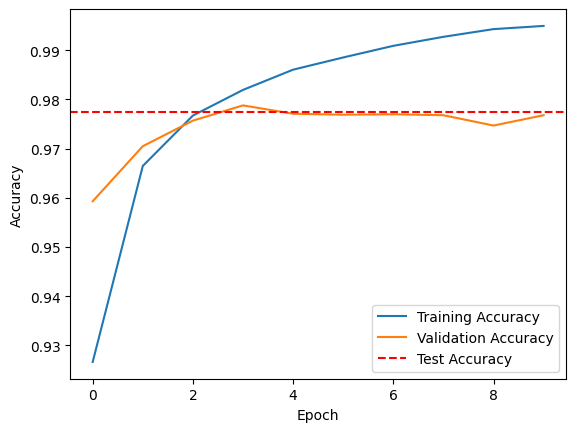

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Example dataset (replace this with your data)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data('/content/intents.json')
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and test accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 0s 2ms/step - loss: 0.0819 - accuracy: 0.9768
Test Loss: 0.08190959692001343
Test Accuracy: 0.9768000245094299


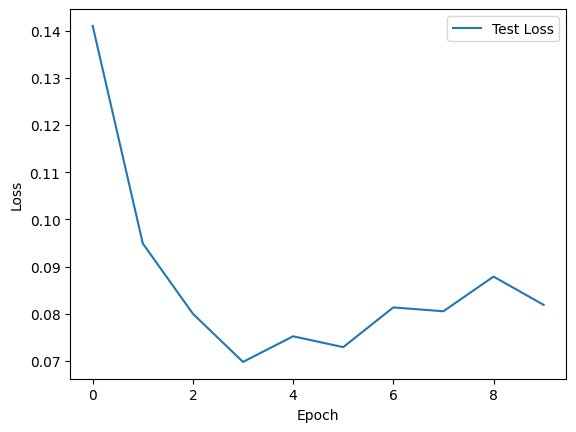

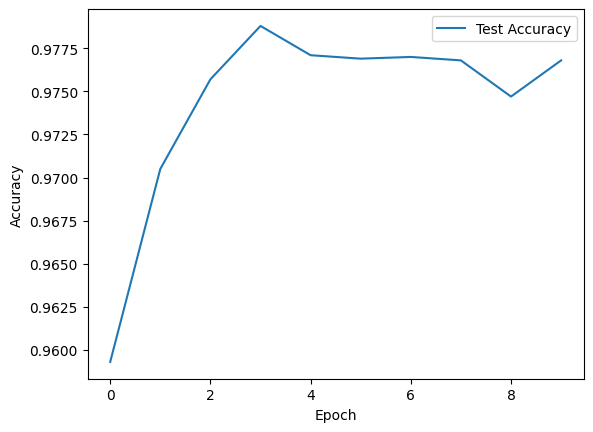

In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot test accuracy
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
import random
import json
import pickle
import numpy as np
import nltk

In [9]:
from nltk.stem import WordNetLemmatizer
from keras.models import load_model

In [10]:
lemmatizer = WordNetLemmatizer()
intents = json.loads(open('/content/intents.json').read())

words = pickle.load(open('words.pkl', 'rb'))
classes = pickle.load(open('classes.pkl', 'rb'))
model = load_model('chatbot_model.h5')


def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word) for word in sentence_words]
    return sentence_words

def bag_of_words (sentence):
    sentence_words = clean_up_sentence(sentence)
    bag = [0] * len(words)
    for w in sentence_words:
        for i, word in enumerate(words):
            if word == w:
                bag[i] = 1
    return np.array(bag)

def predict_class (sentence):
    bow = bag_of_words (sentence)
    res = model.predict(np.array([bow]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i, r] for i, r in enumerate(res) if r > ERROR_THRESHOLD]

    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({'intent': classes [r[0]], 'probability': str(r[1])})
    return return_list

def get_response(intents_list, intents_json):
    tag = intents_list[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if i['tag'] == tag:
            result = random.choice (i['responses'])
            break
    return result

print("!Bot is running!")

while True:
    message = input("")
    ints = predict_class (message)
    res = get_response (ints, intents)
    print (res)

!Bot is running!


KeyboardInterrupt: Interrupted by user